In [1]:
from itertools import islice, combinations, product
from scipy.spatial.distance import squareform
from matplotlib import animation
from IPython.display import HTML

import os
import time
import graco
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
sns.set()
DATA_DIRECTORY = "/home/clusterduck123/Desktop/git/supplements/data"

---

In [31]:
# Get orbit-specific graphlet coefficients
PPI_nx = nx.read_edgelist(f"{DATA_DIRECTORY}/PPI/BioGRID_sc.txt")

N   = PPI_nx.number_of_nodes()
E   = PPI_nx.number_of_edges()
rho = nx.density(PPI_nx)
beta = 0.19772

In [32]:
PPI = PPI_nx
PPI_GCV = graco.coefficients(PPI)

WS = nx.watts_strogatz_graph(N, int(2*E/N), beta)
WS_GCV = graco.coefficients(WS)

sample_dict = {'PPI'    : PPI_GCV['-1'],
               'WS'     :  WS_GCV['-1'],
                   }

sample_list = list(sample_dict.keys())
sample_len  = len(sample_list)

colors = sns.color_palette(n_colors=sample_len)

In [33]:
PPI_C3 = pd.Series(PPI_GCV['-1']['0']['3'].dropna(), name='PPI')
WS_C3  = pd.Series(WS_GCV['-1']['0']['3'].dropna() , name='WS')

PPI_C3.index = range(len(PPI_C3))
WS_C3.index = range(len(WS_C3))

df = pd.concat([PPI_C3, WS_C3], axis=1)

In [34]:
long_form = df.melt()
long_form['x'] = 1

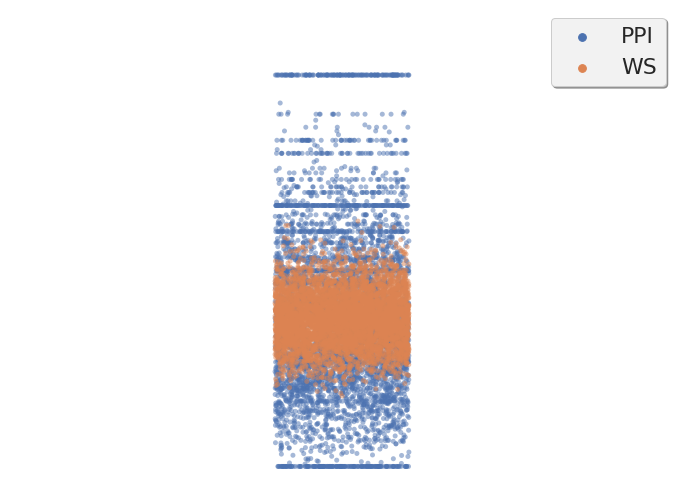

In [35]:
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

buffer = 0.075
ax.set_ylim([-buffer,1.1+buffer])
ax.set_xlim([-buffer,sample_len+10+buffer])
ax.axis('off')

sns.stripplot(x='x', y='value', data=long_form, ax=ax, palette=colors, alpha=0.5, hue='variable');
ax.legend(fontsize=22, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);

fig.savefig(f"{DATA_DIRECTORY}/plots/dummy.png")

### Animate

In [126]:
PPI_C3 = pd.Series(PPI_GCV['-1']['0']['3'].dropna(), name='PPI')
WS_C3  = pd.Series(WS_GCV['-1']['0']['3'].dropna() , name='WS')

PPI_C3.index = range(len(PPI_C3))
WS_C3.index = range(len(WS_C3))

df = pd.concat([PPI_C3, WS_C3], axis=1)

long_form = df.melt()
long_form['x'] = 1

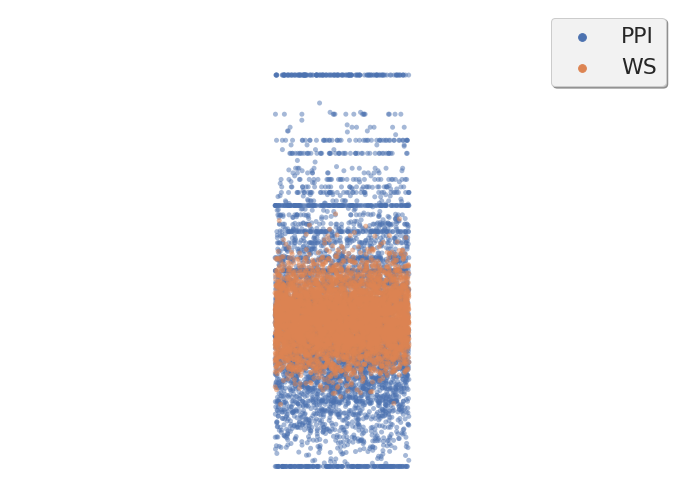

In [13]:
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

buffer = 0.075
ax.set_ylim([-buffer,1.1+buffer])
ax.set_xlim([-buffer,sample_len+10+buffer])
ax.axis('off')

sns.stripplot(x='x', y='value', data=long_form, ax=ax, palette=colors, alpha=0.5, hue='variable');
ax.legend(fontsize=22, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);

fig.savefig(f"{DATA_DIRECTORY}/plots/dummy.png")

In [96]:
from matplotlib import animation
from IPython.display import HTML

PPI_C3 = pd.Series(PPI_GCV['-1']['0']['3'].dropna(), name='PPI')
PPI_C3.index = range(len(PPI_C3))

df = pd.DataFrame(PPI_C3)

long_form = df.melt()
long_form['x'] = 1

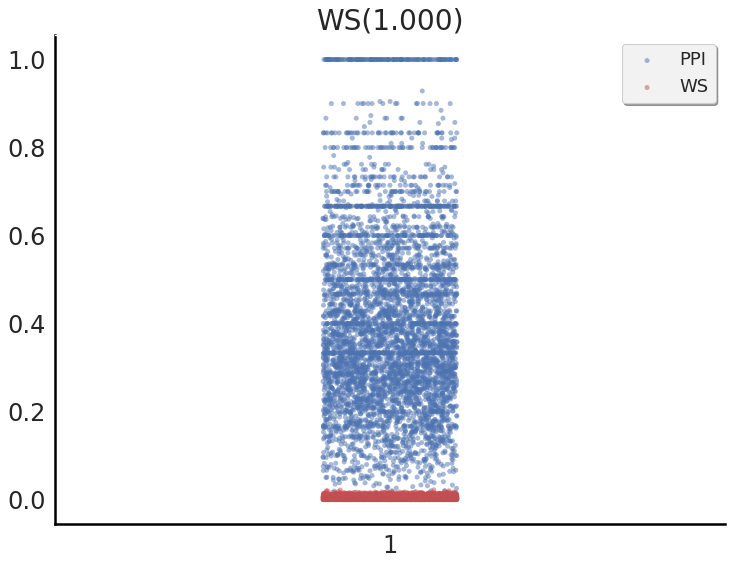

In [203]:
frames = 100
fps = 30

PPI_C3 = pd.DataFrame({'PPI':PPI_GCV['-1']['0']['3'].dropna()})

long_form1 = PPI_C3.melt()
long_form1['x'] = 1

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_alpha(0)


ax.patch.set_alpha(0)

ax.set_title(f'WS({0:.3f})', fontsize=28)
ax.patch.set_alpha(0)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color('black')

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color('black')

sns.stripplot(x='x', y='value', data=long_form1, ax=ax, alpha=0.5, color='b', label='PPI')
sns.stripplot(x='x', y='value', data=long_form2, ax=ax, alpha=0.5, color='r', label='WS')
ax.legend(fontsize=18, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);

# initialization function: plot the background of each frame
def init():
    return []

# animation function.  This is called sequentially
def animate(i):
    del ax.collections[1]
    p = i/(frames-1)
    WS = nx.watts_strogatz_graph(N, int(2*E/N), p)
    WS_GCV = graco.coefficients(WS)
    WS_C3  = pd.DataFrame({'WS':WS_GCV['-1']['0']['3'].dropna()})
    long_form2 = WS_C3.melt()
    long_form2['x'] = 1
    sns.stripplot(x='x', y='value', data=long_form2, ax=ax, alpha=0.5, color='r')
    
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_title(f'WS({p:.3f})', fontsize=28)
    return []

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=1/fps, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

In [204]:
HTML(anim.to_html5_video())

# Triadic plots

In [15]:
def get_WS_graco2(N,k,p):
    WS = nx.watts_strogatz_graph(N, k, p)
    WS_GCV = graco.coefficients(WS)
    return (WS_GCV['-1']['2'][['11', '13', '7' ]]@T).dropna()

def get_WS_graco3(N,k,p):
    WS = nx.watts_strogatz_graph(N, k, p)
    WS_GCV = graco.coefficients(WS)
    return (WS_GCV['-1']['3'][['11', '13', '14' ]]@T).dropna()

In [16]:
v1x, v1y = 0, 0
v2x, v2y = np.sqrt(2), 0
v3x, v3y = np.sqrt(2)/2, np.sqrt(3/2)

v1 = np.array([v1x, v1y])
v2 = np.array([v2x, v2y])
v3 = np.array([v3x, v3y])

T = np.array([v1, v2, v3])
Tinv = np.array([
    [np.sqrt(2)/2, -1/np.sqrt(6)],
    [0, np.sqrt(2/3)]
])

In [17]:
PPI_nx = nx.read_edgelist(f"{DATA_DIRECTORY}/PPI/BioGRID_sc.txt")

C2 = (PPI_GCV['-1']['2'][['11', '13', '7' ]]@T).dropna()
C3 = (PPI_GCV['-1']['3'][['11', '13', '14']]@T).dropna()


N = PPI_nx.number_of_nodes()
E = PPI_nx.number_of_edges()
k = int(2*E/N)

16.53


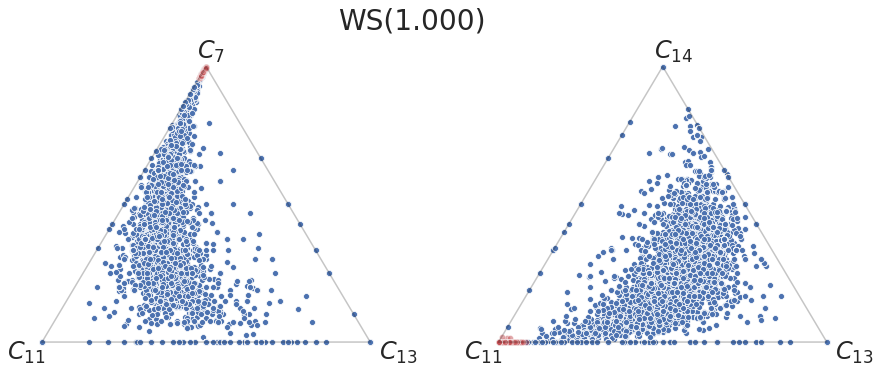

In [20]:
frames = 10
fps = 10

t1 = time.time()

fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.patch.set_alpha(0)
fig.subplots_adjust(hspace = 0.4)

buffer = 0.075

for ax in axes:
    ax.patch.set_alpha(0)
    ax.set_xlim([v1x-2*buffer,v2x+buffer])
    ax.set_ylim([v1y-2*buffer,v3y+buffer])
    ax.axis('off')

axes[0].annotate(r'$C_{11}$',(v1x-2*buffer,v1y-buffer  ), fontsize=24)
axes[0].annotate(r'$C_{13}$',(v2x+buffer/2,v2y-buffer  ), fontsize=24)
axes[0].annotate(r'$C_{7}$' ,(v3x-buffer/2,v3y+buffer/2), fontsize=24)

sns.scatterplot(data = C2, x=0, y=1, ax=axes[0], color=sns.color_palette()[0]);
axes[0].plot([v1x,v2x,v3x,v1x], [v1y,v2y,v3y,v1y], 'k', alpha=0.25);

axes[1].annotate(r'$C_{11}$', (v1x-2*buffer,v1y-buffer  ), fontsize=24)
axes[1].annotate(r'$C_{13}$', (v2x+buffer/2,v2y-buffer  ), fontsize=24)
axes[1].annotate(r'$C_{14}$' ,(v3x-buffer/2,v3y+buffer/2), fontsize=24)

sns.scatterplot(data = C3, x=0, y=1, ax=axes[1], color=sns.color_palette()[0]);
axes[1].plot([v1x,v2x,v3x,v1x], [v1y,v2y,v3y,v1y], 'k', alpha=0.25);

p = 0.0
D2 = get_WS_graco2(N,k,p)
D3 = get_WS_graco3(N,k,p)

sns.scatterplot(data = D2, x=0, y=1, ax=axes[0], color='r', alpha=0.5);
sns.scatterplot(data = D3, x=0, y=1, ax=axes[1], color='r', alpha=0.5);


# initialization function: plot the background of each frame
def init():
    return []

# animation function.  This is called sequentially
def animate(i):
    del axes[0].collections[1]
    del axes[1].collections[1]
    p = i/(frames-1)
    D2 = get_WS_graco2(N,k,p)
    D3 = get_WS_graco3(N,k,p)

    sns.scatterplot(data = D2, x=0, y=1, ax=axes[0], color='r', alpha=0.5);
    sns.scatterplot(data = D3, x=0, y=1, ax=axes[1], color='r', alpha=0.5);
    
    ax.set_ylabel('')    
    ax.set_xlabel('')
    fig.suptitle(f'WS({p:.3f})', fontsize=28)
    return []

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=1/fps, blit=True)

anim.save('basic_animation.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

t2 = time.time()
print(f'{t2-t1:.2f}')

In [21]:
HTML(anim.to_html5_video())

# Animate Geometric Graph

In [3]:
# Get orbit-specific graphlet coefficients
PPI_nx = nx.read_edgelist(f"{DATA_DIRECTORY}/PPI/BioGRID_sc.txt")
PPI_GCV = graco.coefficients(PPI_nx)

N   = PPI_nx.number_of_nodes()
E   = PPI_nx.number_of_edges()
rho = nx.density(PPI_nx)

In [4]:
r_dict = {}
with open(f"{DATA_DIRECTORY}/r_list.txt", 'r') as f:
    for line in f:
        dim, r = line.strip().split()
        r_dict[int(dim)] = float(r)

## Clustering coefficient

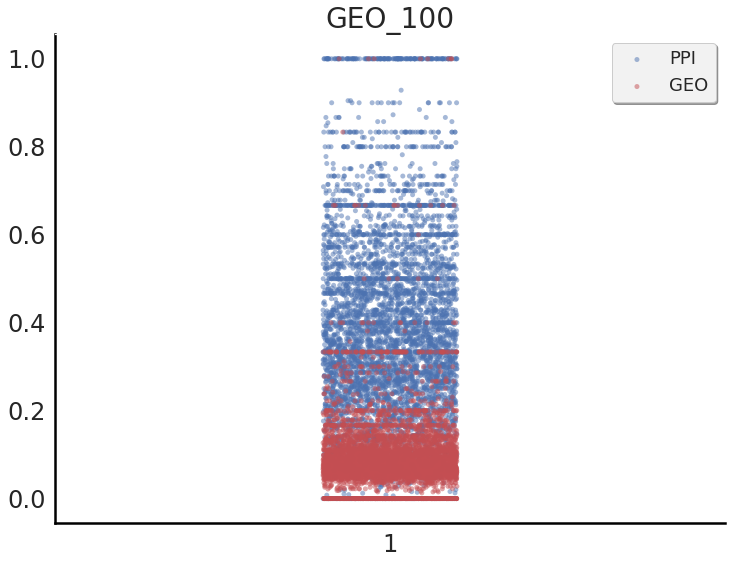

In [5]:
frames = len(r_dict)
fps = 10

PPI_C3 = pd.DataFrame({'PPI':PPI_GCV['-1']['0']['3'].dropna()})

long_form1 = PPI_C3.melt()
long_form1['x'] = 1

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_alpha(0)


ax.patch.set_alpha(0)

ax.set_title(f'WS({0:.3f})', fontsize=28)
ax.patch.set_alpha(0)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color('black')

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color('black')

sns.stripplot(x='x', y='value', data=long_form1, ax=ax, alpha=0.5, color='b', label='PPI')
sns.stripplot(x='x', y='value', data=long_form1, ax=ax, alpha=0.5, color='r', label='GEO')
ax.legend(fontsize=18, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);

# initialization function: plot the background of each frame
def init():
    return []

# animation function.  This is called sequentially
def animate(i):
    del ax.collections[1]
    dim = i+1
    GEO = nx.random_geometric_graph(N, r_dict[dim], dim)
    GEO_GCV = graco.coefficients(GEO)
    GEO_C3  = pd.DataFrame({'GEO':GEO_GCV['-1']['0']['3'].dropna()})
    long_form2 = GEO_C3.melt()
    long_form2['x'] = 1
    sns.stripplot(x='x', y='value', data=long_form2, ax=ax, alpha=0.5, color='r')
    
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_title(f'GEO_{i+1}', fontsize=28)
    return []

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=1/fps, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save(f'{DATA_DIRECTORY}/videos/C0_PPI_vs_GEO.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

In [32]:
HTML(anim.to_html5_video(), metadata={'fps':fps})

## Higher clustering

In [6]:
r_dict = {}
with open(f"{DATA_DIRECTORY}/r_list.txt", 'r') as f:
    for line in f:
        dim, r = line.strip().split()
        r_dict[int(dim)] = float(r)

In [7]:
v1x, v1y = 0, 0
v2x, v2y = np.sqrt(2), 0
v3x, v3y = np.sqrt(2)/2, np.sqrt(3/2)

v1 = np.array([v1x, v1y])
v2 = np.array([v2x, v2y])
v3 = np.array([v3x, v3y])

T = np.array([v1, v2, v3])
Tinv = np.array([
    [np.sqrt(2)/2, -1/np.sqrt(6)],
    [0, np.sqrt(2/3)]
])

In [8]:
def get_GEO_graco2(N,r,dim):
    GEO = nx.random_geometric_graph(N,r,dim)
    GEO_GCV = graco.coefficients(GEO)
    return (GEO_GCV['-1']['2'][['11', '13', '7' ]]@T).dropna()

def get_GEO_graco3(N,r,dim):
    GEO = nx.random_geometric_graph(N,r,dim)
    GEO_GCV = graco.coefficients(GEO)
    return (GEO_GCV['-1']['3'][['11', '13', '14' ]]@T).dropna()

In [9]:
PPI_nx  = nx.read_edgelist(f"{DATA_DIRECTORY}/PPI/BioGRID_sc.txt")
PPI_GCV = graco.coefficients(PPI_nx)

N   = PPI_nx.number_of_nodes()
rho = nx.density(PPI_nx)

C2 = (PPI_GCV['-1']['2'][['11', '13', '7' ]]@T).dropna()
C3 = (PPI_GCV['-1']['3'][['11', '13', '14']]@T).dropna()

319.20


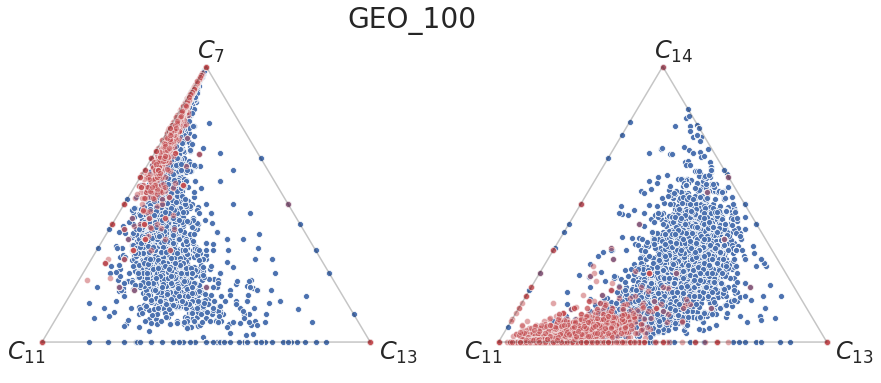

In [10]:
frames = len(r_dict)
fps = 6

t1 = time.time()

fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.patch.set_alpha(0)
fig.subplots_adjust(hspace = 0.4)

buffer = 0.075

for ax in axes:
    ax.patch.set_alpha(0)
    ax.set_xlim([v1x-2*buffer,v2x+buffer])
    ax.set_ylim([v1y-2*buffer,v3y+buffer])
    ax.axis('off')

axes[0].annotate(r'$C_{11}$',(v1x-2*buffer,v1y-buffer  ), fontsize=24)
axes[0].annotate(r'$C_{13}$',(v2x+buffer/2,v2y-buffer  ), fontsize=24)
axes[0].annotate(r'$C_{7}$' ,(v3x-buffer/2,v3y+buffer/2), fontsize=24)

sns.scatterplot(data = C2, x=0, y=1, ax=axes[0], color=sns.color_palette()[0]);
axes[0].plot([v1x,v2x,v3x,v1x], [v1y,v2y,v3y,v1y], 'k', alpha=0.25);

axes[1].annotate(r'$C_{11}$', (v1x-2*buffer,v1y-buffer  ), fontsize=24)
axes[1].annotate(r'$C_{13}$', (v2x+buffer/2,v2y-buffer  ), fontsize=24)
axes[1].annotate(r'$C_{14}$' ,(v3x-buffer/2,v3y+buffer/2), fontsize=24)

sns.scatterplot(data = C3, x=0, y=1, ax=axes[1], color=sns.color_palette()[0]);
axes[1].plot([v1x,v2x,v3x,v1x], [v1y,v2y,v3y,v1y], 'k', alpha=0.25);

sns.scatterplot(data = C2, x=0, y=1, ax=axes[0], color='r', alpha=0.5);
sns.scatterplot(data = C3, x=0, y=1, ax=axes[1], color='r', alpha=0.5);


# initialization function: plot the background of each frame
def init():
    return []

# animation function.  This is called sequentially
def animate(i):
    del axes[0].collections[1]
    del axes[1].collections[1]
    p = i/(frames-1)
    dim = i+1
    r = r_dict[dim]
    D2 = get_GEO_graco2(N,r,dim)
    D3 = get_GEO_graco3(N,r,dim)

    sns.scatterplot(data = D2, x=0, y=1, ax=axes[0], color='r', alpha=0.5);
    sns.scatterplot(data = D3, x=0, y=1, ax=axes[1], color='r', alpha=0.5);
    
    ax.set_ylabel('')    
    ax.set_xlabel('')
    fig.suptitle(f'GEO_{dim}', fontsize=28)
    return []

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=1/fps, blit=True)

anim.save(f'{DATA_DIRECTORY}/videos/C23_PPI_vs_GEO.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

t2 = time.time()
print(f'{t2-t1:.2f}')

In [22]:
HTML(anim.to_html5_video(), metadata={'fps':fps})

In [26]:
len(r_dict)

45

In [11]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
[list(range(i*4,(i+1)*4)) for i in range(10)]

[[0, 1, 2, 3],
 [4, 5, 6, 7],
 [8, 9, 10, 11],
 [12, 13, 14, 15],
 [16, 17, 18, 19],
 [20, 21, 22, 23],
 [24, 25, 26, 27],
 [28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39]]